<a href="https://colab.research.google.com/github/HWP-Wilson/Analise_exploratoria_bolsas_PROUNI2019/blob/main/An%C3%A1lise_de_bolsas_do_prouni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A análise exploratória tem como base o arquivo de dados fornecido pelo Governo Federal, com dados sobre o Prouni 2019.
helanowilson@ufc.br

#1 Primeiro passo importar as bibliotecas

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import numpy as np

#2 Importando arquivos

In [ ]:
dados_importantes = pd.read_csv('dados_importantes.csv', sep=';')

In [ ]:
#Conferindo o tamanho do arquivo trabalhado
dados_importantes.shape

In [ ]:
dados_importantes.head(1)

In [ ]:
dados_importantes.sample(10) # mostra uma sample do DataFrame

In [ ]:
print(dados_importantes.columns)

#Verificando o tipo de cada coluna

In [ ]:
dados_importantes.info()

In [ ]:
from datetime import date
days_in_year = 365.2425

In [ ]:
dados_importantes['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(dados_importantes['DT_NASCIMENTO_BENEFICIARIO'])

In [ ]:
dados_importantes.info()

#Coluna Idade (anos) para distribuição em faixa etária

In [ ]:
dados_importantes['data_atual'] = date.today()
dados_importantes['data_atual'] = pd.to_datetime(dados_importantes['data_atual'])
dados_importantes['Idade'] = (dados_importantes['data_atual'] - dados_importantes['DT_NASCIMENTO_BENEFICIARIO'])/365.24
dados_importantes['Idade_em_anos'] = dados_importantes['Idade'].dt.days

In [ ]:
dados_importantes.head(1)

In [ ]:
dados_importantes['Idade_em_anos'].value_counts()

In [ ]:
A = dados_importantes['Idade_em_anos'].unique()
A.sort()
A

In [ ]:
# 10 a 15
#16 a 17
#18 a 20
#21 a 30
#31 a 40
#41 a 50
# 51 a 60
#61 a 70
#70 ou mais
classes = [10,15,17,20,30,40,50,60,70,100]

In [ ]:
idade = pd.cut(dados_importantes['Idade_em_anos'], classes)
pd.value_counts(idade)

(20, 30]     109765
(17, 20]      83909
(30, 40]      22909
(40, 50]       7110
(50, 60]       1580
(60, 70]        160
(15, 17]        114
(70, 100]         7
(10, 15]          1
Name: Idade_em_anos, dtype: int64

In [ ]:
labels = ['10 a 15 anos', '16 a 17 anos','18 a 20 anos','21 a 30 anos','31 a 40 anos','41 a 50 anos','51 a 60 anos','61 a 70 anos','70 anos ou mais']
idade = pd.cut(dados_importantes['Idade_em_anos'], classes, labels=labels)
pd.value_counts(idade)

21 a 30 anos       109765
18 a 20 anos        83909
31 a 40 anos        22909
41 a 50 anos         7110
51 a 60 anos         1580
61 a 70 anos          160
16 a 17 anos          114
70 anos ou mais         7
10 a 15 anos            1
Name: Idade_em_anos, dtype: int64

#Distribuição de bolsas por faixa Etária

In [ ]:
faixaEtaria = {12: '12-17',16: '12-17',17: '12-17',
    18: '18-20', 19: '18-20', 20: '18-20',
    21: '21-30',22:'21-30',23:'21-30',24:'21-30',25:'21-30',26:'21-30',27:'21-30',28:'21-30',29:'21-30',30:'21-30',
    31:'31-40',32:'31-40',33:'31-40',34:'31-40',35:'31-40',36:'31-40',37:'31-40',38:'31-40',39:'31-40',40:'31-40',
    41:'41-50',42:'41-50',43:'41-50',44:'41-50',45:'41-50',46:'41-50',47:'41-50',48:'41-50',49:'41-50',50:'41-50',
    51: '51-60',52: '51-60',53: '51-60',54: '51-60',55: '51-60',56: '51-60',57: '51-60',58: '51-60',59: '51-60',60: '51-60',
    61:'61-70', 62:'61-70',63:'61-70',64:'61-70',65:'61-70',66:'61-70',67:'61-70',68:'61-70',69:'61-70',70:'61-70',
    72: '71-80',73: '71-80',75: '71-80',76: '71-80',79: '71-80'}
dados_importantes['faixaEtaria']= dados_importantes.Idade_em_anos.map(faixaEtaria)
dados_importantes.head(2)

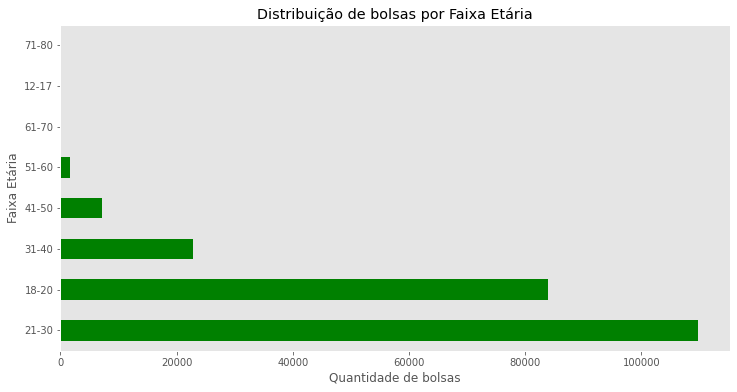

In [ ]:
dados_importantes['faixaEtaria'].value_counts().plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Distribuição de bolsas por Faixa Etária')
plt.xlabel('Quantidade de bolsas')
plt.ylabel('Faixa Etária')
plt.show()

#Verifica-se, para caso de pesquisa se foi erro na coleta de dados ou fraude no sistema de bolsas o fato de um bolsista ter 12 anos. 

In [ ]:
dados_importantes.query("Idade_em_anos == '12'")

#Salvando arquivo novo

In [ ]:
dados_importantes.to_csv('dados_importantes.csv', sep = ';', index=False)

# Quantidade de bolsas integrais e parciais

In [ ]:
dados_importantes['TIPO_BOLSA'].value_counts(normalize=True)*100

BOLSA INTEGRAL       74.397375
BOLSA PARCIAL 50%    25.602625
Name: TIPO_BOLSA, dtype: float64

# Bolsas para Deficientes fisicos

In [ ]:
dados_importantes['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts(normalize=True)*100

N    99.279998
S     0.720002
Name: BENEFICIARIO_DEFICIENTE_FISICO, dtype: float64

#Proporção de bolsas para Masculino e Feminino

In [ ]:
dados_importantes['SEXO_BENEFICIARIO_BOLSA'].value_counts(normalize=True)*100

#Printar porcentagem de bolsas femininas...

#Conferindo se ainda tem valores nulos

In [ ]:
dados_importantes.isnull().shape

In [ ]:
dados_importantes.info()

In [ ]:
dados_importantes.dropna(inplace=True)
dados_importantes.head(1)

,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,data_atual,Idade,Idade_em_anos
0,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,2020-11-02,27 days 04:57:44.768371481,27


#Verificando tipos de bolsa para criar codigo 

In [ ]:
dados_importantes['TIPO_BOLSA'].unique()

array(['BOLSA INTEGRAL', 'BOLSA PARCIAL 50%'], dtype=object)

In [ ]:
troca = {'BOLSA INTEGRAL': 100, 'BOLSA PARCIAL 50%': 50}
dados_importantes['BOLSA']= dados_importantes.TIPO_BOLSA.map(troca)
dados_importantes

In [ ]:
dados_importantes.query("MODALIDADE_ENSINO_BOLSA == 'EAD'")

In [ ]:
dados_importantes['BOLSA'].unique()

In [ ]:
dados_importantes.columns

In [ ]:
dados_importantes['DT_NASCIMENTO_BENEFICIARIO'].unique()
                                                      

In [ ]:
dados_importantes['DT_NASCIMENTO_BENEFICIARIO'].head(5)

#Análise da modalidade de ensino (SISTEMA PRESENCIAL x EAD)

In [ ]:
dados_importantes['MODALIDADE_ENSINO_BOLSA'].value_counts(normalize=True)*100

Presencial    70.184656
EAD           29.815344
Name: MODALIDADE_ENSINO_BOLSA, dtype: float64

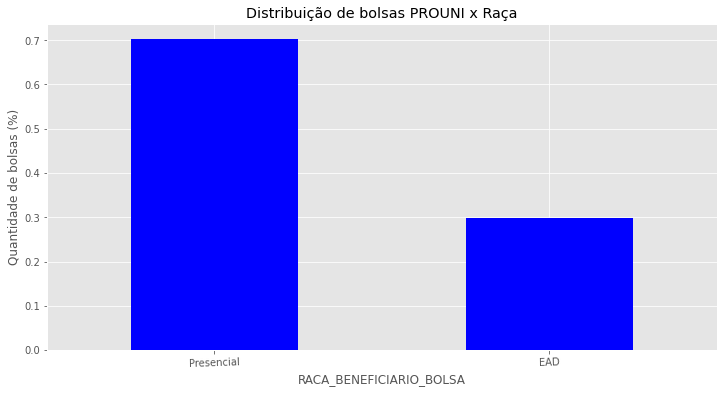

In [ ]:
dados_importantes['MODALIDADE_ENSINO_BOLSA'].value_counts(normalize=True).plot(kind='bar', figsize=(12,6), grid = True, rot=2, color ='blue')
plt.title('Distribuição de bolsas PROUNI x Raça')
plt.xlabel('RACA_BENEFICIARIO_BOLSA')
plt.ylabel('Quantidade de bolsas (%)')
plt.show()

#Análise variável 1

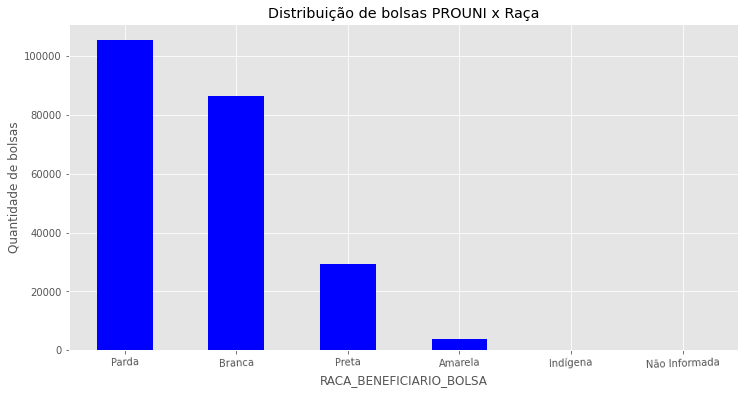

In [ ]:
dados_importantes['RACA_BENEFICIARIO_BOLSA'].value_counts().plot(kind='bar', figsize=(12,6), grid = True, rot=2, color ='blue')
plt.title('Distribuição de bolsas PROUNI x Raça')
plt.xlabel('RACA_BENEFICIARIO_BOLSA')
plt.ylabel('Quantidade de bolsas')
plt.show()

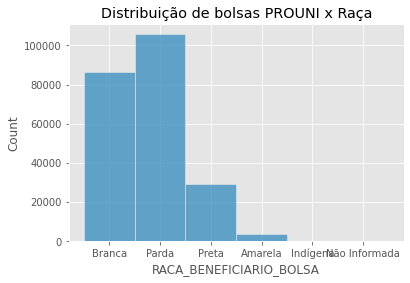

In [ ]:
ax =sns.histplot(data=dados_importantes, x='RACA_BENEFICIARIO_BOLSA')
plt.title('Distribuição de bolsas PROUNI x Raça')
ax

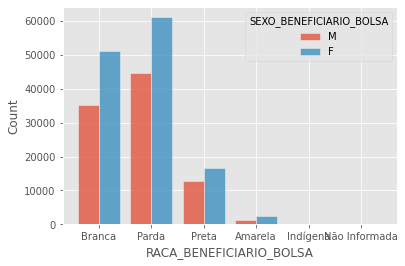

In [ ]:
sns.histplot(data=dados_importantes, x="RACA_BENEFICIARIO_BOLSA", hue="SEXO_BENEFICIARIO_BOLSA", multiple="dodge", shrink=.8)

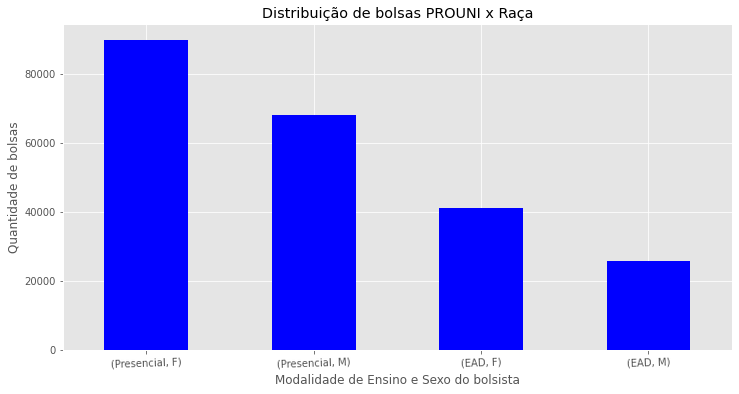

In [ ]:
dados_importantes[['MODALIDADE_ENSINO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA']].value_counts().plot(kind='bar', figsize=(12,6), grid = True, rot=2, color ='blue')
plt.title('Distribuição de bolsas PROUNI x Raça')
plt.xlabel('Modalidade de Ensino e Sexo do bolsista')
plt.ylabel('Quantidade de bolsas')
plt.show()

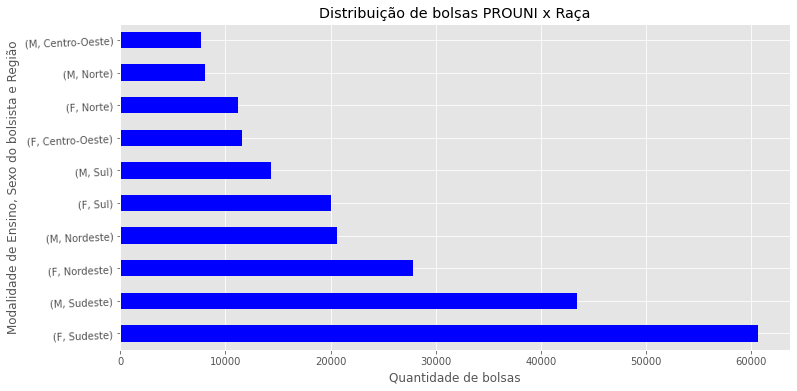

In [ ]:
dados_importantes[['SEXO_BENEFICIARIO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA']].value_counts().plot(kind='barh', figsize=(12,6), grid = True, rot=2, color ='blue')
plt.title('Distribuição de bolsas PROUNI x Raça')
plt.xlabel('Quantidade de bolsas')
plt.ylabel('Modalidade de Ensino, Sexo do bolsista e Região')
plt.show()

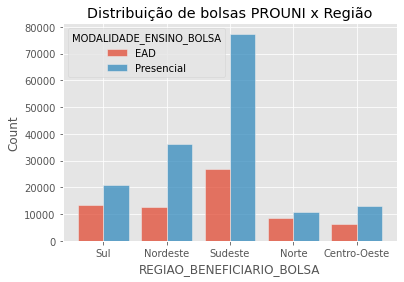

In [ ]:
ax =sns.histplot(data=dados_importantes, x='REGIAO_BENEFICIARIO_BOLSA', hue="MODALIDADE_ENSINO_BOLSA", multiple="dodge", shrink=.8)
plt.title('Distribuição de bolsas PROUNI x Região')
ax

Text(0.5, 1.0, 'Distribuição de bolsas PROUNI x Região')

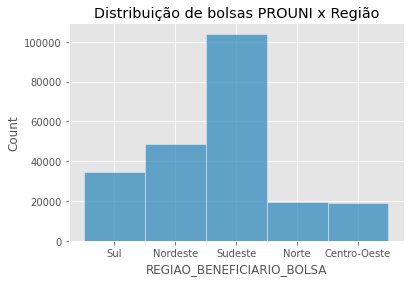

In [ ]:
ax =sns.histplot(data=dados_importantes, x='REGIAO_BENEFICIARIO_BOLSA')
plt.title('Distribuição de bolsas PROUNI x Região')

Text(0.5, 1.0, 'Distribuição de bolsas PROUNI x Raça')

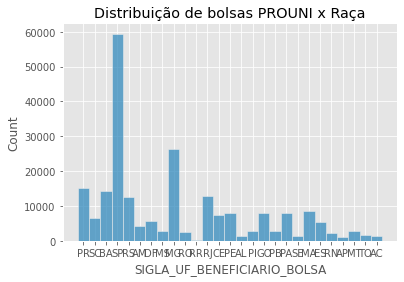

In [ ]:
sns.histplot(data=dados_importantes, x='SIGLA_UF_BENEFICIARIO_BOLSA', bins=30)
plt.title('Distribuição de bolsas PROUNI x Raça')


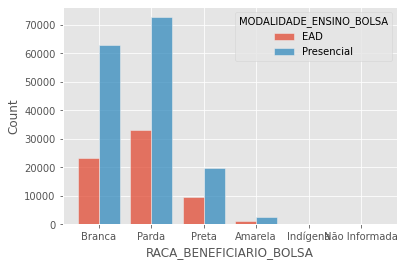

In [ ]:
sns.histplot(data=dados_importantes, x="RACA_BENEFICIARIO_BOLSA", hue="MODALIDADE_ENSINO_BOLSA", multiple="dodge", shrink=.8)

In [ ]:
troca = {'M': 1, 'F': 0}
dados_importantes['SEXO']= dados_importantes.SEXO_BENEFICIARIO_BOLSA.map(troca)
dados_importantes

In [ ]:
dados_importantes['SEXO'].unique()

In [ ]:
sexo_bolsa = dados_importantes[['BOLSA' ,'SEXO_BENEFICIARIO_BOLSA']]
sexo_bolsa

#Tentar melhorar esse trecho= Bolsa 100% e fazer relação

In [ ]:
bolsa_integral = sexo_bolsa.query("SEXO_BENEFICIARIO_BOLSA == 'M' & BOLSA == 100" and "SEXO_BENEFICIARIO_BOLSA == 'F' & BOLSA == 100")

#Analisando ranking das 10 faculdades mais contempladas

In [ ]:
dados_importantes['NOME_IES_BOLSA'].value_counts()


UNIVERSIDADE PAULISTA                       36618
CENTRO UNIVERSITÁRIO INTERNACIONAL           8598
UNIVERSIDADE ESTÁCIO DE SÁ                   7009
CENTRO UNIVERSITÁRIO LEONARDO DA VINCI       5344
UNIVERSIDADE PITÁGORAS UNOPAR                4864
                                            ...  
FACULDADE SHALOM DE ENSINO SUPERIOR             1
FACULDADE DE TECNOLOGIA FRANCISCO MORATO        1
FACULDADE PITÁGORAS DE BOM JESUS DA LAPA        1
FACULDADE ADVENTISTA PARANAENSE                 1
FACULDADE INTEGRADA DAS CATARATAS               1
Name: NOME_IES_BOLSA, Length: 1271, dtype: int64

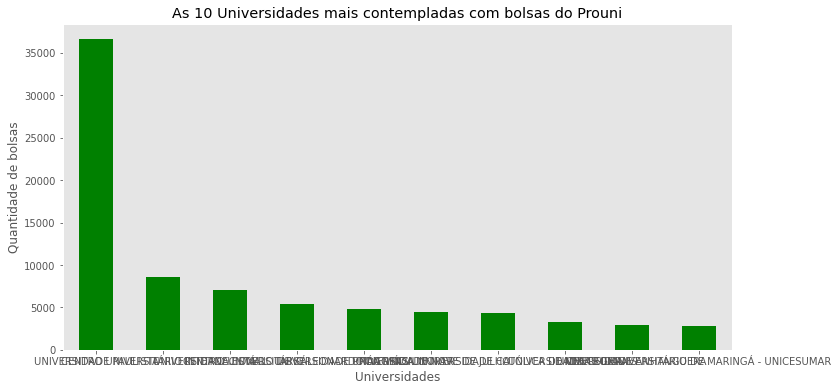

In [ ]:
dados_importantes['NOME_IES_BOLSA'].value_counts().head(10).plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('As 10 Universidades mais contempladas com bolsas do Prouni')
plt.xlabel('Universidades')
plt.ylabel('Quantidade de bolsas')
plt.show()

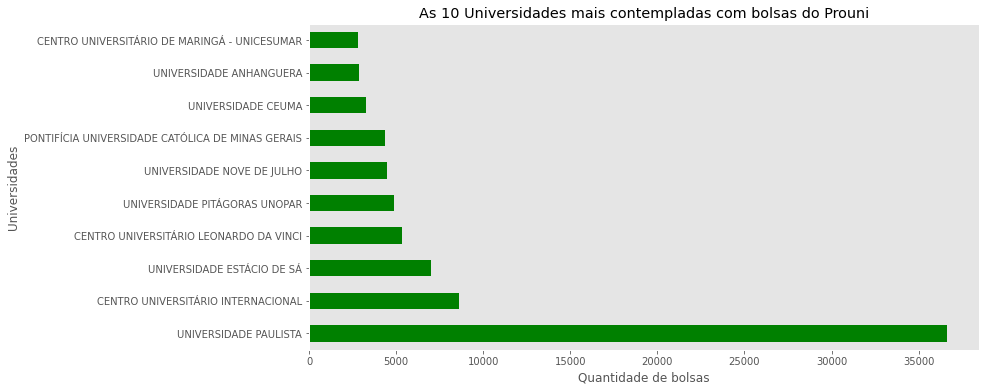

In [ ]:
dados_importantes['NOME_IES_BOLSA'].value_counts().head(10).plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('As 10 Universidades mais contempladas com bolsas do Prouni')
plt.ylabel('Universidades')
plt.xlabel('Quantidade de bolsas')
plt.show()

#Analisando os 10 cursos mais contemplados

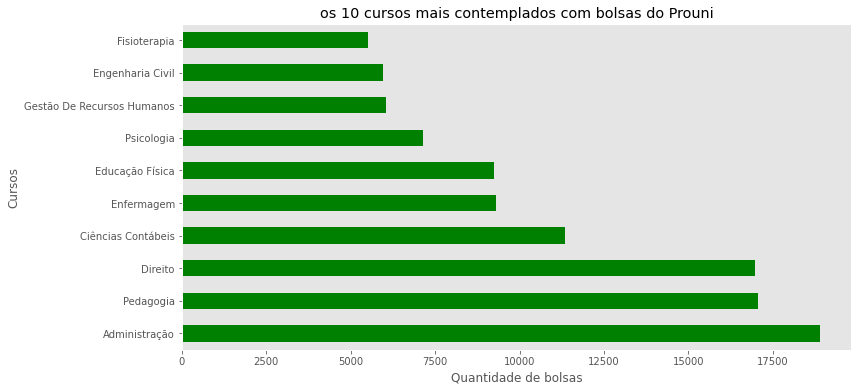

In [ ]:
dados_importantes['NOME_CURSO_BOLSA'].value_counts().head(10).plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('os 10 cursos mais contemplados com bolsas do Prouni')
plt.ylabel('Cursos')
plt.xlabel('Quantidade de bolsas')
plt.show()


#Distribuição de bolsa por região

Text(0, 0.5, 'Quantidade de bolsas')

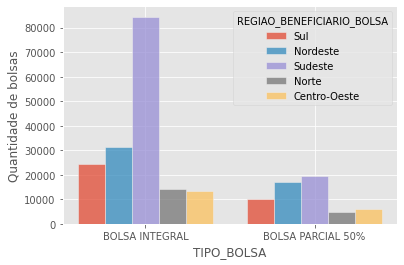

In [ ]:
sns.histplot(data=dados_importantes, x="TIPO_BOLSA", hue="REGIAO_BENEFICIARIO_BOLSA", multiple="dodge", shrink=.8)
plt.ylabel('Quantidade de bolsas')

Text(0.5, 1.0, 'Distribuição de bolsas por raça')

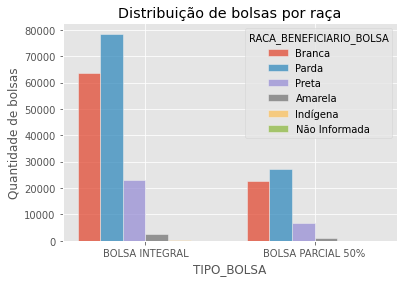

In [ ]:
sns.histplot(data=dados_importantes, x="TIPO_BOLSA", hue="RACA_BENEFICIARIO_BOLSA", multiple="dodge", shrink=.8)
plt.ylabel('Quantidade de bolsas')
plt.title('Distribuição de bolsas por raça')

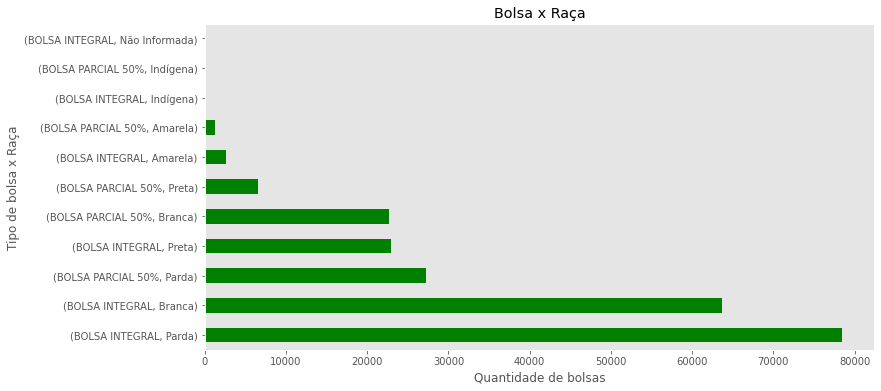

In [ ]:
dados_importantes[['TIPO_BOLSA','RACA_BENEFICIARIO_BOLSA']].value_counts().plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Bolsa x Raça')
plt.xlabel('Quantidade de bolsas')
plt.ylabel('Tipo de bolsa x Raça')
plt.show()

In [ ]:
 bolsistas_PDF = dados_importantes.query('BENEFICIARIO_DEFICIENTE_FISICO == "S"')
 bolsistas_PDF

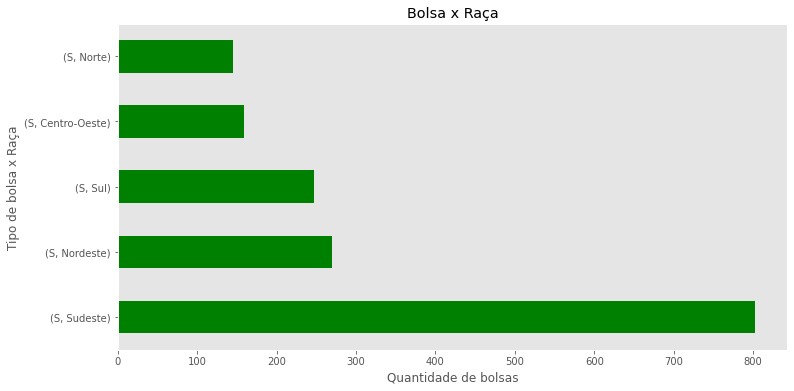

In [ ]:
bolsistas_PDF[['BENEFICIARIO_DEFICIENTE_FISICO','REGIAO_BENEFICIARIO_BOLSA']].value_counts().plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Bolsa x Raça')
plt.xlabel('Quantidade de bolsas')
plt.ylabel('Tipo de bolsa x Raça')
plt.show()

In [ ]:
bolsistas_Ceara = dados_importantes.query('SIGLA_UF_BENEFICIARIO_BOLSA == "CE"')
bolsistas_Ceara.head(1)

,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,data_atual,Idade,Idade_em_anos,BOLSA,SEXO
533,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,Presencial,Pedagogia,Matutino,F,Branca,2000-11-01,N,Nordeste,CE,FORTALEZA,2020-11-02,20 days 00:04:43.868141496,20,100,0


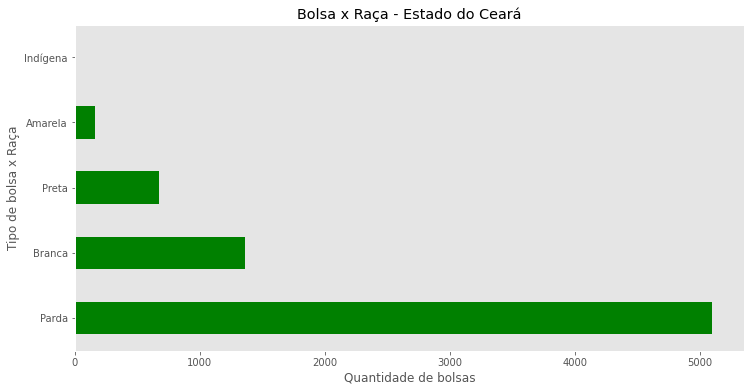

In [ ]:
bolsistas_Ceara['RACA_BENEFICIARIO_BOLSA'].value_counts().plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Bolsa x Raça - Estado do Ceará')
plt.xlabel('Quantidade de bolsas')
plt.ylabel('Tipo de bolsa x Raça')
plt.show()

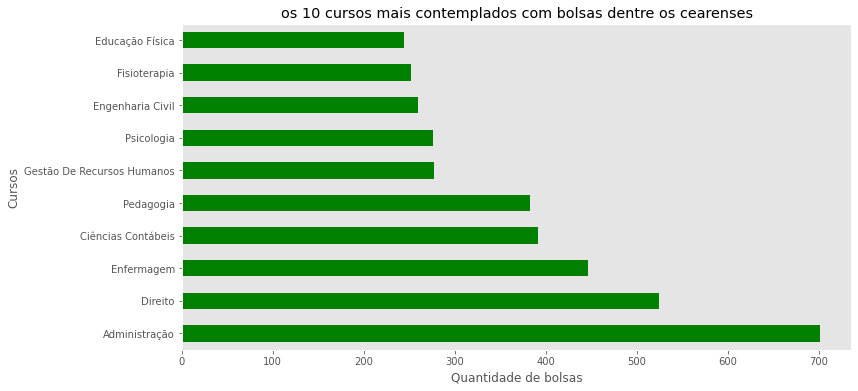

In [ ]:
bolsistas_Ceara['NOME_CURSO_BOLSA'].value_counts().head(10).plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('os 10 cursos mais contemplados com bolsas dentre os cearenses')
plt.ylabel('Cursos')
plt.xlabel('Quantidade de bolsas')
plt.show()

In [ ]:
bolsistas_SP = dados_importantes.query('SIGLA_UF_BENEFICIARIO_BOLSA == "SP"')
bolsistas_SP.head(1)

,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,data_atual,Idade,Idade_em_anos,BOLSA,SEXO
61,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,Presencial,Administração,Noturno,F,Branca,1994-05-09,N,Sudeste,SP,PRESIDENTE VENCESLAU,2020-11-02,26 days 11:40:50.334026941,26,100,0


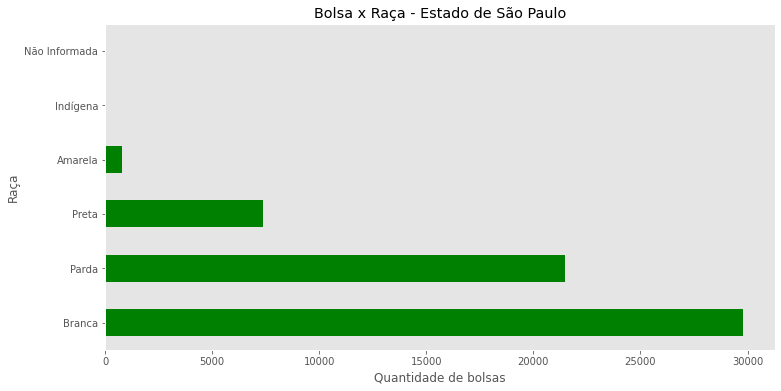

In [ ]:
bolsistas_SP['RACA_BENEFICIARIO_BOLSA'].value_counts().plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Bolsa x Raça - Estado de São Paulo')
plt.xlabel('Quantidade de bolsas')
plt.ylabel('Raça')
plt.show()

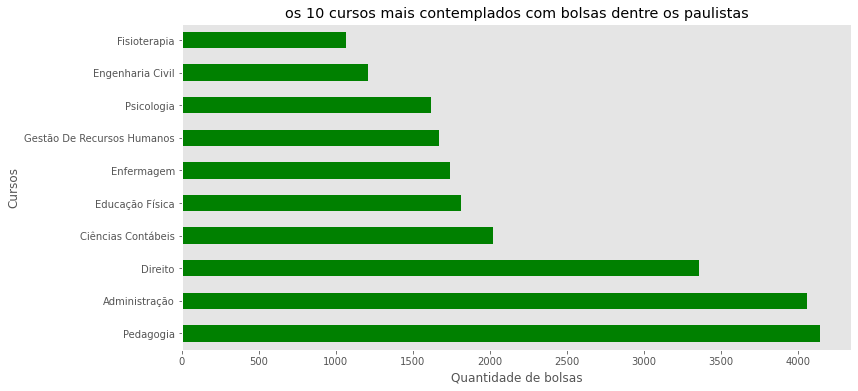

In [ ]:
bolsistas_SP['NOME_CURSO_BOLSA'].value_counts().head(10).plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('os 10 cursos mais contemplados com bolsas dentre os paulistas')
plt.ylabel('Cursos')
plt.xlabel('Quantidade de bolsas')
plt.show()

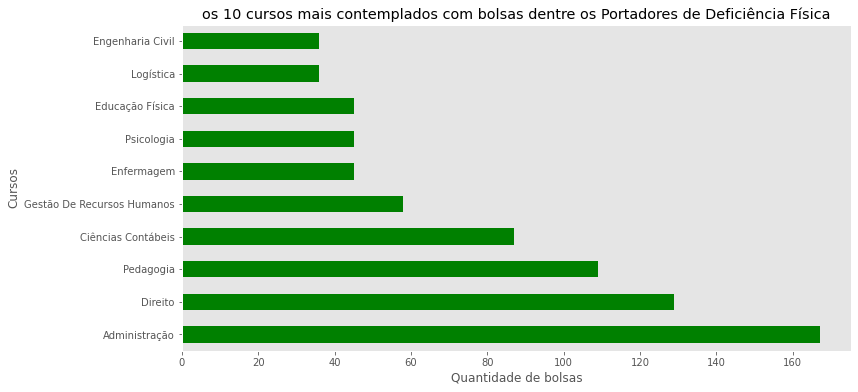

In [ ]:
bolsistas_PDF['NOME_CURSO_BOLSA'].value_counts().head(10).plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('os 10 cursos mais contemplados com bolsas dentre os Portadores de Deficiência Física')
plt.ylabel('Cursos')
plt.xlabel('Quantidade de bolsas')
plt.show()

In [ ]:
bolsistas_PRETO = dados_importantes.query('RACA_BENEFICIARIO_BOLSA == "Preta"')
bolsistas_PRETO.head(2)

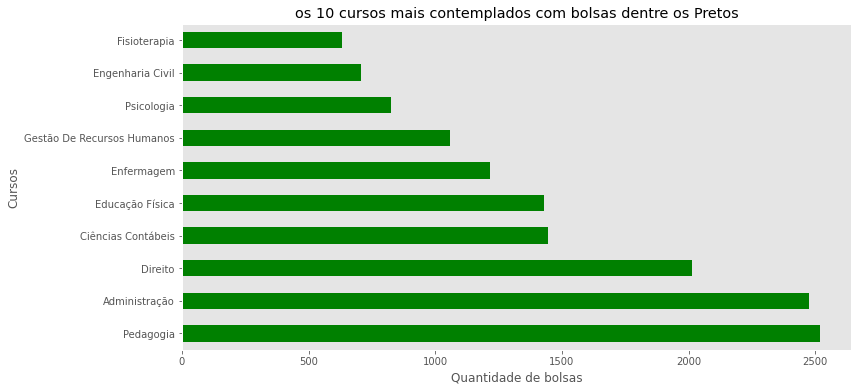

In [ ]:
bolsistas_PRETO['NOME_CURSO_BOLSA'].value_counts().head(10).plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('os 10 cursos mais contemplados com bolsas dentre os Pretos')
plt.ylabel('Cursos')
plt.xlabel('Quantidade de bolsas')
plt.show()

In [ ]:
dados_importantes.query('Idade_em_anos > 10 & Idade_em_anos < 15')


,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,data_atual,Idade,Idade_em_anos,BOLSA,SEXO,faixaEtaria
219393,CENTRO UNIVERSITÁRIO DE CARATINGA,BOLSA PARCIAL 50%,Presencial,Odontologia,Noturno,F,Branca,2008-08-30,N,Sudeste,MG,ORIZANIA,2020-11-02,12 days 04:12:48.021027269,12,50,0,12-17


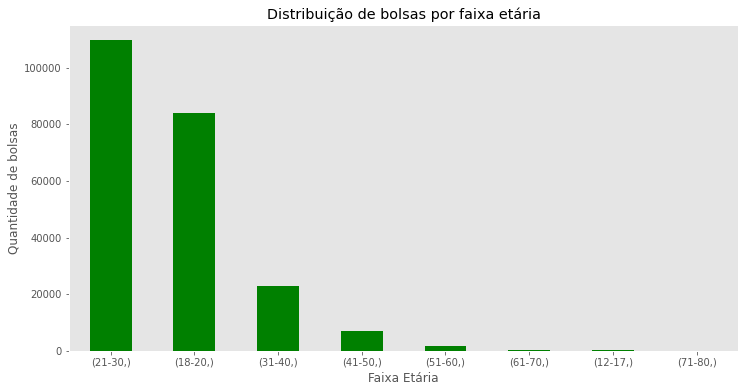

In [ ]:
dados_importantes[['faixaEtaria']].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Distribuição de bolsas por faixa etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de bolsas')
plt.show()

Text(0, 0.5, 'Quantidade de bolsas')

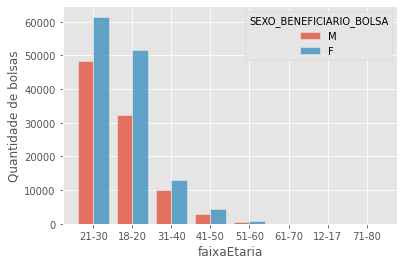

In [ ]:
sns.histplot(data=dados_importantes, x="faixaEtaria", hue="SEXO_BENEFICIARIO_BOLSA", multiple="dodge", shrink=.8)
plt.ylabel('Quantidade de bolsas')